# Employee Attrition Prediction System

An AI powered web application that predicts employee attrition risk using 
the IBM HR Analytics dataset. Built with Logical Regression/Random Forest/XGBoost and integrated 
with SHAP for explainable AI. The system provides transparent predictions and 
actionable insights for HR decision-making. Features a clean HTML/CSS/JS 
frontend and Flask API backend, deployed as a full-stack project.

# The Business Problem
Employee attrition (turnover) is expensive and disruptive. When employees leave:

Companies lose institutional knowledge
Teams lose productivity during transition
Recruiting and training new employees costs 50-200% of annual salary
Morale drops when talented people leave

**The real pain:** Most companies only react AFTER an employee resigns. By then, it's too late.

# The Business Question

"Can we predict which employees are at risk of leaving BEFORE they resign, so we can intervene proactively?"
Specific Business Goals:

1. Identify high-risk employees 3-6 months before they leave
2. Understand WHY employees leave (root causes)
3. Take preventive action - retention bonuses, career development, workload adjustment
4. Calculate ROI - If preventing 1 resignation saves $50k-$100k, the model pays for itself quickly

**Target Stakeholders:**

1. HR Teams: Design retention strategies
2. Managers: Have conversations with at-risk employees
3. Leadership: Understand organization-wide attrition drivers
4. Finance: Quantify cost savings from retention

# The Data

This project uses the IBM HR Analytics dataset to answer the following question:

"What employee characteristics, work patterns, and job factors predict attrition?"

1. **Who is most likely to leave?**
- What demographics correlate with attrition?
- Which departments/roles have highest turnover?


2. **What drives attrition?**
- Is it compensation? Work-life balance? Career growth?
- Which factors have the strongest predictive power?

3. **When do they leave?**
- Do employees leave early (0-2 years) or later?
- Is there a tenure pattern?

4. **Can we predict it accurately?**
- What's our prediction accuracy?
- How many at-risk employees can we catch before they leave?


# IBM HR Analytics Dataset - 1,470 employee records with:

- Demographics: Age, Gender, Marital Status, Education
- Job Factors: Role, Department, Level, Travel Frequency
- Compensation: Salary, Stock Options, Pay Raises
- Satisfaction Metrics: Job, Environment, Work-Life Balance
- Tenure: Years at company, in role, with manager
- Outcome: Attrition (Yes/No) - our target variable




# Success Criteria

**Business Success:**

1. Identify 70%+ of employees who will leave (High Recall)
2. Provide explainable predictions (not a black box)
3. Deliver actionable insights HR can use
4. Deploy as user-friendly tool for non-technical users

**Technical Success:**

1. F1 Score > 0.45 (balancing precision & recall on imbalanced data)
2. AUC-ROC > 0.80 (strong discrimination ability)
3. Recall > 70% (catch most attrition cases)
4. Explainable AI (SHAP) showing WHY predictions are made

# How this Translates into Success

**Example Workflow:**

1. Model predicts Employee X has 78% attrition risk
2. SHAP explains Top factors: Low salary vs peers, no promotion in 4 years, overtime
3. HR takes action:
- Schedule career development conversation
- Review compensation vs market
- Address workload concerns

4. Track outcome: Did intervention work? Update model with feedback

# The Ultimate Goal

Shift from REACTIVE (exit interviews) → PROACTIVE (retention before resignation)
By predicting and explaining attrition, we help organisations:

1. Retain top talent
2. Reduce recruitment costs
3. Maintain team stability
4. Improve employee satisfaction
5. Make data-driven HR decisions



In [1]:
# Import Necessary Libraries
import pandas as pd  
import numpy as np
from IPython.display import display, Markdown

# Load IBM HR Analytics dataset
file_path = "/Users/sere/Downloads/My Projects/Employee Attrition Prediction System/IBM HR Analytics Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information
display(Markdown("### Dataset Overview"))
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Display first few rows
display(Markdown("### **First 5 Rows of Data:**"))
display(df.head())

# Display column names and data types
display(Markdown("### **Column Information:**"))
display(df.info())

# Display basic statistics
display(Markdown("### **Statistical Summary:**"))
display(df.describe())

# Check for missing values
display(Markdown("### **Missing Values:**"))
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    display(missing[missing > 0])

# Check target variable distribution
display(Markdown("### **Target Variable (Attrition) Distribution:**"))
attrition_counts = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

print(f"\nAttrition Counts:")
print(attrition_counts)
print(f"\nAttrition Percentage:")
print(f"No:  {attrition_pct['No']:.2f}%")
print(f"Yes: {attrition_pct['Yes']:.2f}%")

### Dataset Overview


Dataset Shape: 1470 rows × 35 columns


### **First 5 Rows of Data:**

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **Column Information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

### **Statistical Summary:**

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### **Missing Values:**

No missing values found!


### **Target Variable (Attrition) Distribution:**


Attrition Counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition Percentage:
No:  83.88%
Yes: 16.12%


**Comment:**

The target variable which is Attritio is imbalanced:

No (those who stayed): 1,233 employees → 83.88%

Yes (those who left): 237 employees → 16.12%

This means the dataset is heavily skewed toward non-attrition cases, with about 5 times more employees staying than leaving.

# DATA ANALYSIS

In [2]:
# Import Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ==========================================
#  DATA CLEANING
# ==========================================

print("\n" + "="*80)
print("DATA CLEANING")
print("="*80)

print("\n EXPLANATION:")
print("   We need to remove columns that don't help prediction:")
print("   - Constant columns (same value for all employees)")
print("   - ID columns (just identifiers, not predictive)")

# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\n Constant columns found: {constant_cols}")
print(f"  Reason: These have the same value for all employees, so they can't predict anything")

# Remove constant columns and employee number
cols_to_drop = constant_cols + ['EmployeeNumber']
df_clean = df.drop(columns=cols_to_drop)

print(f"\n Columns removed: {len(cols_to_drop)}")
print(f" Remaining columns: {df_clean.shape[1]}")
print(f" Cleaned Dataset shape: {df_clean.shape[0]} employees × {df_clean.shape[1]} features")



DATA CLEANING

 EXPLANATION:
   We need to remove columns that don't help prediction:
   - Constant columns (same value for all employees)
   - ID columns (just identifiers, not predictive)

 Constant columns found: ['EmployeeCount', 'Over18', 'StandardHours']
  Reason: These have the same value for all employees, so they can't predict anything

 Columns removed: 4
 Remaining columns: 31
 Cleaned Dataset shape: 1470 employees × 31 features


# Exploratory Data Analysis (EDA)

EDA helps us understand patterns in the data:
- Which features correlate with attrition?
- Are there obvious patterns?
- Do we have data quality issues?


--------------------------------------------------------------------------------
CATEGORICAL FEATURES vs ATTRITION
--------------------------------------------------------------------------------

Key Insights from Categorical Features:
  • Department: Highest attrition in 'Sales' (20.6%)
  • JobRole: Highest attrition in 'Sales Representative' (39.8%)
  • OverTime: Highest attrition in 'Yes' (30.5%)
  • BusinessTravel: Highest attrition in 'Travel_Frequently' (24.9%)
  • MaritalStatus: Highest attrition in 'Single' (25.5%)
  • Gender: Highest attrition in 'Male' (17.0%)


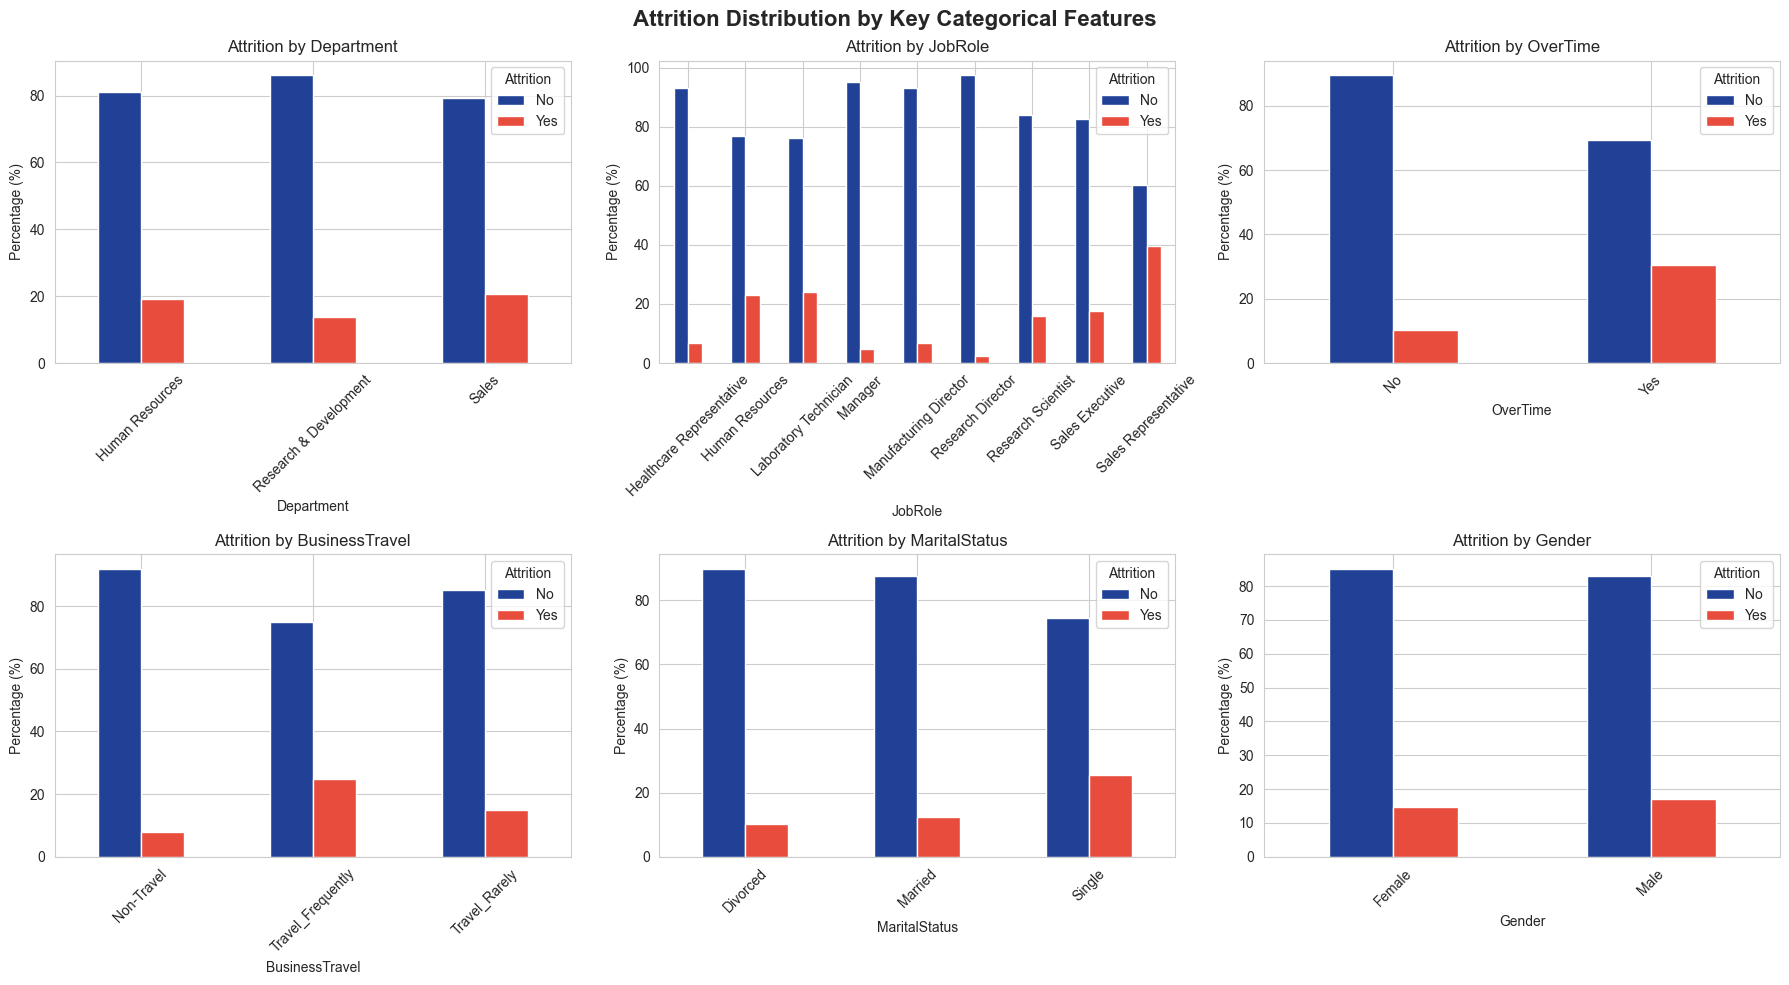

In [3]:
# Categorical Features Analysis
print("\n" + "-"*80)
print("CATEGORICAL FEATURES vs ATTRITION")
print("-"*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Attrition Distribution by Key Categorical Features', fontsize=16, fontweight='bold')

categorical_features = ['Department', 'JobRole', 'OverTime', 'BusinessTravel', 'MaritalStatus', 'Gender']

print("\nKey Insights from Categorical Features:")
for idx, feature in enumerate(categorical_features):
    row, col = idx // 3, idx % 3
    
    # Calculate attrition rates
    attrition_counts = pd.crosstab(df_clean[feature], df_clean['Attrition'], normalize='index') * 100
    
    # Plot
    attrition_counts.plot(kind='bar', ax=axes[row, col], color=['#204196', '#e74c3c'])
    axes[row, col].set_title(f'Attrition by {feature}')
    axes[row, col].set_ylabel('Percentage (%)')
    axes[row, col].legend(title='Attrition', labels=['No', 'Yes'])
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Print insights
    max_attrition = attrition_counts['Yes'].idxmax()
    max_attrition_rate = attrition_counts['Yes'].max()
    print(f"  • {feature}: Highest attrition in '{max_attrition}' ({max_attrition_rate:.1f}%)")

plt.tight_layout()
plt.show()

**Comment:**

- Employees working in the Sales department, particularly in the Sales Representative role, are the most likely to leave the company.
- Attrition is also notably higher among those who work overtime, travel frequently, and are single.
- Additionally, male employees show a higher likelihood of leaving compared to females.



--------------------------------------------------------------------------------
NUMERICAL FEATURES vs ATTRITION
--------------------------------------------------------------------------------

Key Insights from Numerical Features:
  • Age: Avg for Attrition=33.6, No Attrition=37.6 (-10.5% diff)
  • MonthlyIncome: Avg for Attrition=4787.1, No Attrition=6832.7 (-29.9% diff)
  • YearsAtCompany: Avg for Attrition=5.1, No Attrition=7.4 (-30.4% diff)
  • DistanceFromHome: Avg for Attrition=10.6, No Attrition=8.9 (+19.3% diff)
  • TotalWorkingYears: Avg for Attrition=8.2, No Attrition=11.9 (-30.5% diff)
  • YearsInCurrentRole: Avg for Attrition=2.9, No Attrition=4.5 (-35.3% diff)


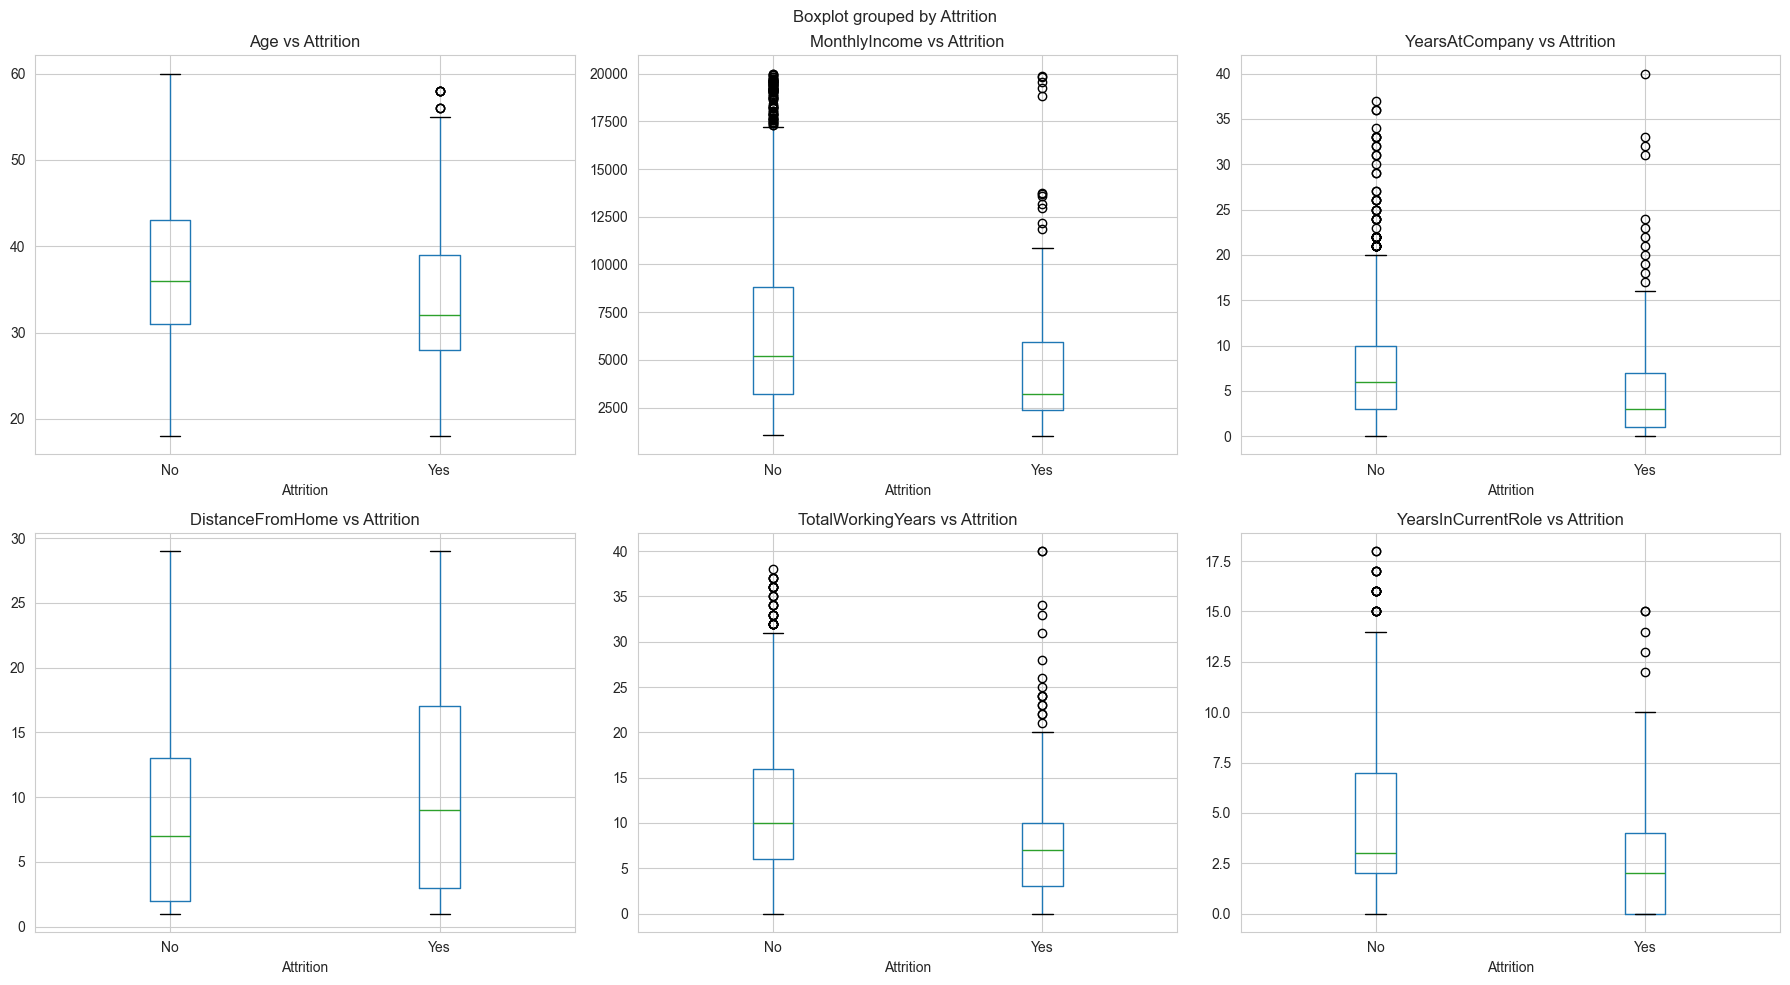

In [4]:
# Numerical Features Analysis
print("\n" + "-"*80)
print("NUMERICAL FEATURES vs ATTRITION")
print("-"*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Key Numerical Features Distribution by Attrition', fontsize=16, fontweight='bold')

numerical_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 
                     'DistanceFromHome', 'TotalWorkingYears', 'YearsInCurrentRole']

print("\nKey Insights from Numerical Features:")
for idx, feature in enumerate(numerical_features):
    row, col = idx // 3, idx % 3
    df_clean.boxplot(column=feature, by='Attrition', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Attrition')
    axes[row, col].set_xlabel('Attrition')
    plt.sca(axes[row, col])
    
    # Calculate means
    mean_no = df_clean[df_clean['Attrition']=='No'][feature].mean()
    mean_yes = df_clean[df_clean['Attrition']=='Yes'][feature].mean()
    diff = ((mean_yes - mean_no) / mean_no * 100)
    
    print(f"  • {feature}: Avg for Attrition={mean_yes:.1f}, No Attrition={mean_no:.1f} ({diff:+.1f}% diff)")

plt.tight_layout()
plt.show()


**Comment:**

- Employees who leave the company tend to be younger, earn lower monthly incomes, and have shorter tenure both overall and in their current roles.
- They also generally have fewer total working years and live farther from the workplace compared to those who stay.
- These patterns suggest that less experienced, lower-paid, and more distant employees are at a higher risk of attrition.


--------------------------------------------------------------------------------
CORRELATION ANALYSIS
--------------------------------------------------------------------------------


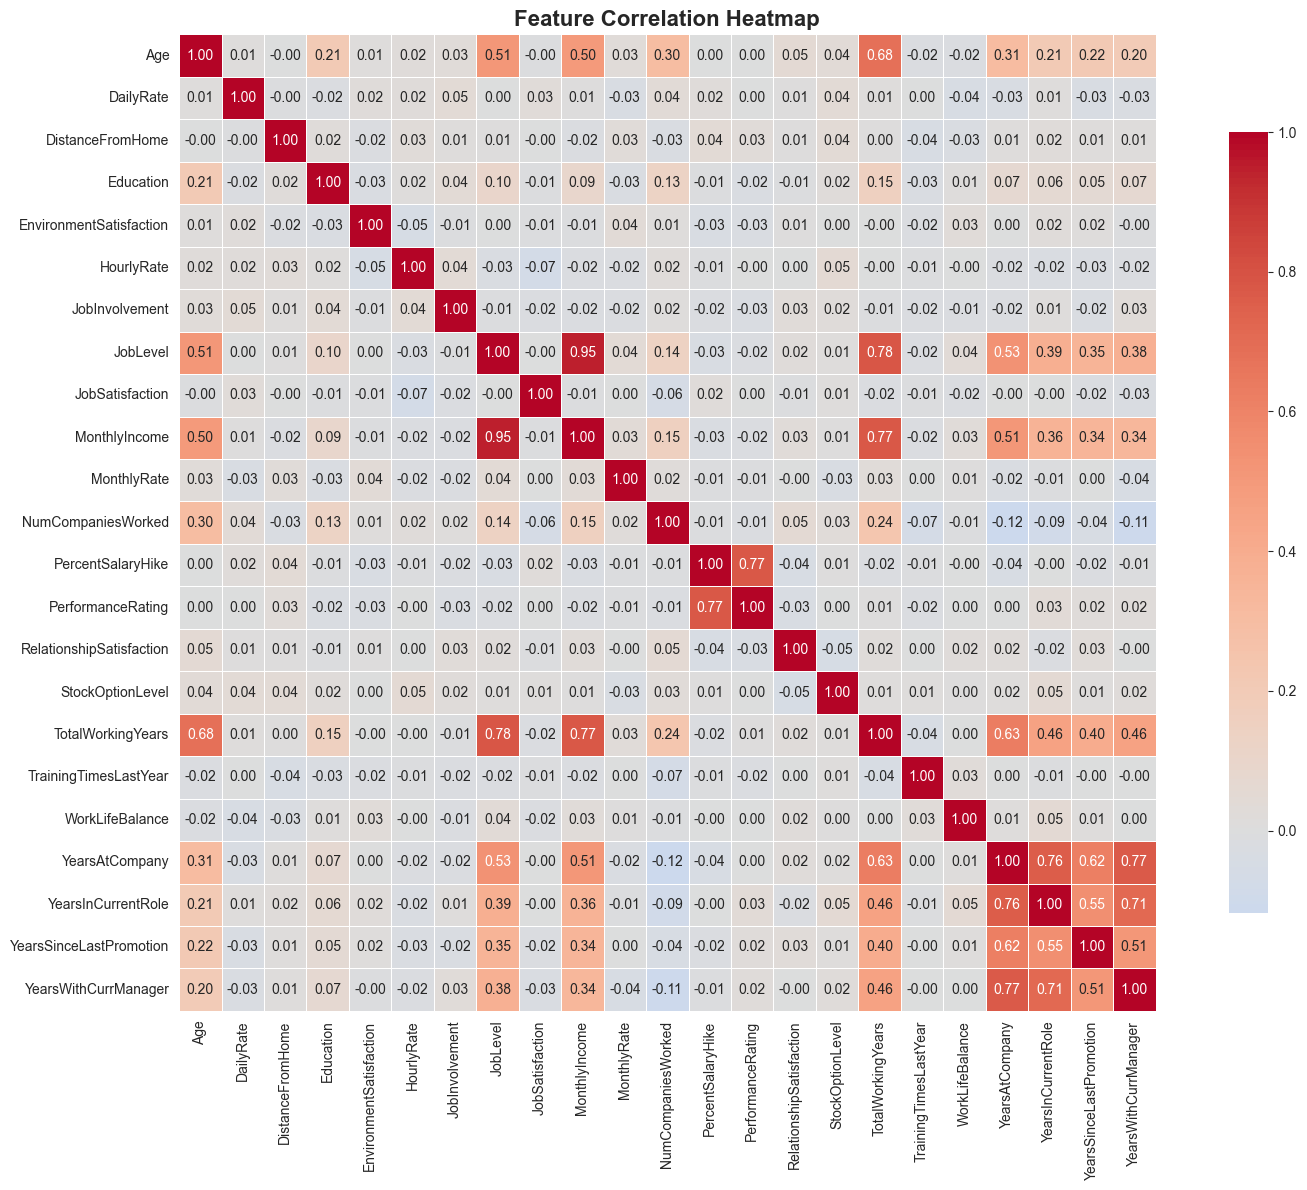


 Highly Correlated Features (potential redundancy):
  • JobLevel ↔ MonthlyIncome: 0.950
  • JobLevel ↔ TotalWorkingYears: 0.782
  • PercentSalaryHike ↔ PerformanceRating: 0.774
  • MonthlyIncome ↔ TotalWorkingYears: 0.773
  • YearsAtCompany ↔ YearsWithCurrManager: 0.769


In [5]:
# Correlation Analysis
print("\n" + "-"*80)
print("CORRELATION ANALYSIS")
print("-"*80)

numerical_cols_clean = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols_clean].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations
print("\n Highly Correlated Features (potential redundancy):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

for feat1, feat2, corr in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)[:5]:
    print(f"  • {feat1} ↔ {feat2}: {corr:.3f}")


**Comment:**

These results show pairs of features that are strongly correlated (|r| > 0.7), which may indicate redundancy in the dataset:

- JobLevel ↔ MonthlyIncome (0.950): Extremely high correlation — higher job levels naturally lead to higher monthly income. One of these features could be removed to avoid multicollinearity.

- JobLevel ↔ TotalWorkingYears (0.782): Higher job levels are typically associated with more years of experience.

- PercentSalaryHike ↔ PerformanceRating (0.774): Salary hikes are strongly tied to performance ratings, which may reflect company policy.

- MonthlyIncome ↔ TotalWorkingYears (0.773): More experienced employees generally earn higher income.

- YearsAtCompany ↔ YearsWithCurrManager (0.769): Employees who’ve been longer in the company often have longer tenures with their current manager.

**Insight:**
Maybe I have to drop or combine one variable from each highly correlated pair (especially **JobLevel or MonthlyIncome**) to reduce multicollinearity and simplify the model without losing much information. Or better still, test both approaches and compare performance.

**Footnote:**
Multicollinearity means that two or more independent (predictor) variables in a dataset are highly correlated with each other. In other words, they carry similar or overlapping information about the target variable.

**HERE IS MY THOUGHT AND WHY THE BOTH APPROACH**

**Why Leaving Redundant Features Maybe Better**

1. Tree-Based Models Are Robust:
Models like Random Forest and XGBoost inherently handle correlated features well because they:

- Split on the most informative variables at each node
- Naturally "ignore" redundant ones during tree construction
- Are not mathematically affected by multicollinearity like linear models

So, multicollinearity doesn't harm their performance or interpretability much.

2. Regularized Logistic Regression Mitigates Multicollinearity:

Since I am using L2 (Ridge) regularization, the model penalizes large coefficients from redundant features
- This reduces their impact automatically by shrinking correlated coefficients
- The model can still leverage information from all features


**Why Removing Redundant Features May Be Better**

1. Simpler Model and Better Interpretability:

- Removing redundant features (e.g., keeping MonthlyIncome and dropping JobLevel) makes feature importance clearer
- Especially important for Logistic Regression explainability when presenting to stakeholders
- Fewer features = easier to explain WHY the model makes predictions

2. Potential Performance Boost:

- While tree models usually won't gain much, Logistic Regression might improve marginally
- Removing highly correlated variables can make Logistic Regression more stable
- Reduces noise in the model even for robust algorithms

3. Better Generalization:

- Reducing correlated features helps the model generalize better on unseen data
- Less noise and fewer redundant relationships to learn
- Lower risk of overfitting to training data patterns

**Decision:** Test both approaches empirically and compare performance.

# Model Development

**Starting with Feature Engineering**

- Training baseline models with ALL features first
- Then test with reduced features and compare results 

In [ ]:
# Feature Engineering - All Features
print("\n" + "-"*80)
print("FEATURE ENGINEERING BASELINE")
print("-"*80)

# Import Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Create a copy
df_processed = df_clean.copy()

# Encode target
le_target = LabelEncoder()
df_processed['Attrition'] = le_target.fit_transform(df_processed['Attrition'])
print(f"\n Target Variable Encoding:")
print(f"  'No' → 0, 'Yes' → 1")

# Separate features and target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Feature Types:")
print(f"  Total features: {X.shape[1]}")
print(f"  Categorical features: {len(categorical_cols)}")
print(f"  Numerical features: {len(numerical_cols)}")

# Encode categorical
label_encoders = {}
print(f"\n Encoding Categorical Features:")
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"  • {col}: {len(le.classes_)} categories → {list(range(len(le.classes_)))}")

# Save unscaled version for later use with reduced features
X_unscaled = X.copy()

# Scale numerical for baseline models
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(f"\n Standardized {len(numerical_cols)} numerical features (mean=0, std=1)")
print(f" Feature count: {X.shape[1]}")
print(f" ✅ Saved unscaled version as X_unscaled for reduced features")


--------------------------------------------------------------------------------
FEATURE ENGINEERING BASELINE
--------------------------------------------------------------------------------


**Comment:**

The dataset has been prepared for modeling:

1. Target Variable Encoding:

- Converted the attrition labels from 'No'/'Yes' to numeric 0/1, making them suitable for machine learning models.

2. Feature Overview:

- Total features: 30

- Categorical: 7 → encoded as integers

- Numerical: 23 → standardized (mean = 0, std = 1) to ensure features are on the same scale, which helps models like Logistic Regression converge faster.

3. Categorical Encoding Examples:

- Multi-class features (e.g., JobRole with 9 categories) were mapped to numeric values [0–8].

- Binary features (e.g., Gender, OverTime) were mapped to 0/1.

**Summary:**
This step transformed raw data into a clean, numeric format that models can process efficiently, while standardizing numerical features and encoding categorical ones.

In [ ]:
# Train-Test Split
print("\n" + "-"*80)
print("TRAIN-TEST SPLIT")
print("-"*80)

print("   Split data into training (80%) and testing (20%) sets")
print("   Stratify ensures both sets have similar attrition ratios")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n Data Split:")
print(f"  Training set: {X_train.shape[0]} employees ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set: {X_test.shape[0]} employees ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n Class Distribution:")
print(f"  Training - No: {sum(y_train==0)} ({sum(y_train==0)/len(y_train)*100:.2f}%), Yes: {sum(y_train==1)} ({sum(y_train==1)/len(y_train)*100:.2f}%)")
print(f"  Test     - No: {sum(y_test==0)} ({sum(y_test==0)/len(y_test)*100:.2f}%), Yes: {sum(y_test==1)} ({sum(y_test==1)/len(y_test)*100:.2f}%)")


In [ ]:
# Baseline Model Training - All Features
print("\n" + "-"*80)
print("BASELINE MODEL TRAINING ALL 30 FEATURES")
print("-"*80)

print(" Train 3 models with ALL features as baseline")
print(" Use class_weight='balanced' to handle imbalanced data")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# Initialize dictionaries to store models and their evaluation results
models = {}
results = {}

In [ ]:
# Confusion Matrix Values
from sklearn.metrics import confusion_matrix

# MODEL 1: Logistic Regression
print("\n" + "-"*80)
print("MODEL 1: LOGISTIC REGRESSION")
print("-"*80)
print("Training with all 30 features...")

lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

models['Logistic Regression'] = lr_model
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_lr)
}

print(" Training complete")
print(f"  F1 Score: {results['Logistic Regression']['f1']:.4f}")
print(f"  Recall: {results['Logistic Regression']['recall']:.4f}")
print(f"  Precision: {results['Logistic Regression']['precision']:.4f}")
print(f"  Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"  AUC-ROC: {results['Logistic Regression']['auc_roc']:.4f}")

# Confusion Matrix Breakdown

cm = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm.ravel()
print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")

In [ ]:
# Visualization for Logistic Regression

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Logistic Regression - Model Performance (All 30 Features)', fontsize=16, fontweight='bold')

# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train, y_train, 
    cv=5, 
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42,
    n_jobs=-1
)

axes[0, 0].plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
axes[0, 0].plot(train_sizes, val_scores.mean(axis=1), label='Validation Score', marker='o')
axes[0, 0].fill_between(train_sizes, 
                         train_scores.mean(axis=1) - train_scores.std(axis=1),
                         train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1)
axes[0, 0].fill_between(train_sizes, 
                         val_scores.mean(axis=1) - val_scores.std(axis=1),
                         val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.1)
axes[0, 0].set_xlabel('Training Set Size')
axes[0, 0].set_ylabel('F1 Score')
axes[0, 0].set_title('Learning Curve')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
axes[1, 0].plot(fpr, tpr, label=f'ROC Curve (AUC = {results["Logistic Regression"]["auc_roc"]:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_lr)
axes[1, 1].plot(recall_vals, precision_vals, label=f'PR Curve')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve')
axes[1, 1].axhline(y=results["Logistic Regression"]["precision"], color='r', linestyle='--', label=f'Precision = {results["Logistic Regression"]["precision"]:.3f}')
axes[1, 1].axvline(x=results["Logistic Regression"]["recall"], color='g', linestyle='--', label=f'Recall = {results["Logistic Regression"]["recall"]:.3f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("  Visualizations complete")

In [ ]:
# MODEL 2: Random Forest
print("\n" + "-"*80)
print("MODEL 2: RANDOM FOREST")
print("-"*80)
print("Training with all 30 features...")

rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,
    random_state=42, 
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1': f1_score(y_test, y_pred_rf),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_rf)
}

print(" Training complete")
print(f"  F1 Score: {results['Random Forest']['f1']:.4f}")
print(f"  Recall: {results['Random Forest']['recall']:.4f}")
print(f"  Precision: {results['Random Forest']['precision']:.4f}")
print(f"  Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"  AUC-ROC: {results['Random Forest']['auc_roc']:.4f}")


# Confusion Matrix Breakdown
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")

In [ ]:
# MODEL 3: XGBoost
print("\n" + "-"*80)
print("MODEL 3: XGBOOST")
print("-"*80)
print("Training with all 30 features...")

scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

models['XGBoost'] = xgb_model
results['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_xgb)
}

print(" Training complete")
print(f"  F1 Score: {results['XGBoost']['f1']:.4f}")
print(f"  Recall: {results['XGBoost']['recall']:.4f}")
print(f"  Precision: {results['XGBoost']['precision']:.4f}")
print(f"  Accuracy: {results['XGBoost']['accuracy']:.4f}")
print(f"  AUC-ROC: {results['XGBoost']['auc_roc']:.4f}")


# Confusion Matrix Breakdown
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm_xgb.ravel()

print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")

In [ ]:
# Baseline Result Summary
print("\n" + "-"*80)
print("BASELINE RESULTS ALL 30 FEATURES")
print("-"*80)


results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("\n Performance Metrics:")
display(results_df)

best_model_name = results_df['f1'].idxmax()
print(f"\n Best Baseline Model: {best_model_name}")
print(f"   F1 Score: {results_df.loc[best_model_name, 'f1']:.4f}")
print(f"   Recall: {results_df.loc[best_model_name, 'recall']:.4f}")
print(f"   AUC-ROC: {results_df.loc[best_model_name, 'auc_roc']:.4f}")


# Model Interpretation

**MODEL 1: LOGICAL REGRESSION - BEST MODEL**

- **Accuracy (75%)**: Correct 3 out of 4 times overall *(but misleading due to imbalance!)*
- **Precision (37%)**: When we predict someone will leave, we're right **37% of the time**
  - Translation: Out of 100 flagged employees, only 37 actually leave
  - **63 false alarms** (flagged but stayed)
  
- **Recall (77%)**: We catch **77% of employees who actually leave**
  - Translation: Out of 100 employees who left, we caught 77 before they resigned
  - **Missed 23** who left
  
- **F1 (0.50)**: Decent balance between precision and recall
- **AUC (0.81)**: Strong ability to distinguish who will leave vs stay

**Business Impact:**
-  **PRO**: Catches most people at risk (77%)
-  **CON**: Many false alarms (63 out of 100 flagged don't actually leave)
-  **Decision**: False alarms are acceptable - better to check on someone unnecessarily than lose a key employee

**Why It Won:**
- **Best recall (77%)** - critical for HR use case
- **Best F1 score** - best balance
- **Simplest model** - easy to interpret and deploy

**MODEL 2: RANDOM FOREST**

- **Accuracy (84%)**: Highest accuracy! But
- **Precision (45%)**: When we flag someone, we're right 45% of the time
  - Better than Logistic Regression!
  
- **Recall (11%)**: **ONLY catches 11% of employees who leave** 
  - Translation: Out of 100 employees who left, we only caught **11**
  - **Missed 89 employees!** 
  
- **F1 (0.17)**: Terrible - very imbalanced

**Business Impact:**
- **PRO**: High accuracy, fewer false alarms
- **CRITICAL FLAW**: Misses 89% of employees who will leave!
- **Decision**: Completely unacceptable for HR - the whole point is to catch people before they leave

**Why It Lost:**
- **Too conservative** - only flags when very certain
- **High precision, terrible recall** - wrong trade-off for this problem
- Model is basically saying "No one will leave" most of the time

**MODEL 3: XGBOOST**

- **Accuracy (85%)**: Highest accuracy
- **Precision (54%)**: Best precision! When we flag someone, we're right 54% of the time
- Only 46 false alarms per 100 flagged


- **Recall (40%)**: Catches 40% of employees who leave
- Translation: Out of 100 employees who left, we caught 40
- **Missed 60 employees who left**


- **F1 (0.46)**: Second best

**Business Impact:**

- **PRO**: Best precision - fewer false alarms
- **CON**: Misses 60% of employees who will leave
- **Decision**: Better than Random Forest, but still misses too many

**Why It Lost:**

- Recall too low - missing 60% of attrition is unacceptable
- Prioritized accuracy over catching leavers


**THE ACCURACY PARADOX**
Why High Accuracy ≠ Good Model
The Dataset:

84% employees stay (No Attrition)
16% employees leave (Attrition)

A "Dumb" Model:
If I just predicted "NO ONE WILL LEAVE" for everyone:

Accuracy: 84% (correct for all stayers!)
Recall: 0% (catches zero leavers) 

This is why:

Random Forest has 84% accuracy but terrible recall (11%)
XGBoost has 85% accuracy but mediocre recall (40%)
Logistic Regression has "only" 75% accuracy but BEST recall (77%)

For imbalanced data, accuracy is misleading!


**WHY LOGISTIC REGRESSION IS THE BEST MODEL**
For HR Attrition:

High Recall is CRITICAL - Must catch people before they leave
False alarms are acceptable - Better to check on someone unnecessarily than lose them
Cost-benefit: Conversation with flagged employee costs $0-500, replacing resigned employee costs $50,000-150,000

Logistic Regression:

- Catches 77% of leavers (best)
- Simplest, most interpretable
- Best F1 score (balance)
- 63% false alarm rate (acceptable trade-off)

**BUSINESS TRANSLATION**

Scenario: Company with 1,000 employees
Using Logistic Regression (Best Model):

Predicts 160 employees at risk (16%)
Actual leavers caught: 123 (77% of 160 actual leavers) 
False alarms: 59 employees (flagged but won't leave)
Result: Save 123 employees, waste time on 59

Using XGBoost:

Actual leavers caught: 64 (40% of 160 actual leavers) 
Missed: 96 employees who will leave
Result: Lose 96 valuable employees!

Using Random Forest:

Actual leavers caught: 17 (11% of 160 actual leavers) 
Missed: 143 employees who will leave!
Result: Complete failure - HR is blindsided by 143 resignations!



**KEY LESSON**

In imbalanced classification for business problems, optimize for the right metric - not accuracy

For employee attrition:

Recall > Precision (catch leavers >> avoid false alarms)
F1 Score is best single metric
Accuracy is misleading when classes are imbalanced



# Trained Model on Redeced Features

Remove one feature from each highly correlated pair
- Remove JobLevel (keep MonthlyIncome - more direct impact
- Remove PerformanceRating (keep PercentSalaryHike - more actionable
- Remove YearsWithCurrManager (keep YearsAtCompany - broader measure

In [ ]:
# Train Model with Reduced Features
print("\n" + "-"*80)
print("EXPERIMENT: TRAINING MODELS WITH REDUCED FEATURES (27)")
print("-"*80)

# Features to remove based on correlation > 0.75
features_to_remove = ['JobLevel', 'PerformanceRating', 'YearsWithCurrManager']

print(f"\n Baseline features: 30")
print(f" Removing {len(features_to_remove)} redundant features")

# Start from UNSCALED data
X_reduced = X_unscaled.drop(columns=features_to_remove)

print(f" Reduced features: {X_reduced.shape[1]}")

# Do train-test split on UNSCALED reduced data
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Identify which numerical columns remain
numerical_cols_reduced = [col for col in numerical_cols if col not in features_to_remove]
print(f" Numerical columns in reduced set: {len(numerical_cols_reduced)}")

# Create and fit a NEW scaler - FIRST TIME SCALING for reduced features
scaler_reduced = StandardScaler()
X_train_reduced[numerical_cols_reduced] = scaler_reduced.fit_transform(X_train_reduced[numerical_cols_reduced])
X_test_reduced[numerical_cols_reduced] = scaler_reduced.transform(X_test_reduced[numerical_cols_reduced])

print(f" ✅ Scaled {len(numerical_cols_reduced)} numerical features (FIRST TIME - no double scaling)")

# Initialize dictionaries to store models and their evaluation results
models_reduced = {}
results_reduced = {}

In [ ]:
# Train Model on Reduced Features
print("\n" + "-"*80)
print("MODEL 1: LOGISTIC REGRESSION - REDUCED FEATURES")
print("-"*80)
print("Training with 27 reduced features...")
lr_reduced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_reduced.fit(X_train_reduced, y_train)
y_pred_lr_reduced = lr_reduced.predict(X_test_reduced)
y_pred_proba_lr_reduced = lr_reduced.predict_proba(X_test_reduced)[:, 1]
models_reduced['Logistic Regression'] = lr_reduced
results_reduced['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr_reduced),
    'precision': precision_score(y_test, y_pred_lr_reduced),
    'recall': recall_score(y_test, y_pred_lr_reduced),
    'f1': f1_score(y_test, y_pred_lr_reduced),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_lr_reduced)
}
print(" Training complete")
print(f"  F1 Score: {results_reduced['Logistic Regression']['f1']:.4f}")
print(f"  Recall: {results_reduced['Logistic Regression']['recall']:.4f}")
print(f"  Precision: {results_reduced['Logistic Regression']['precision']:.4f}")
print(f"  Accuracy: {results_reduced['Logistic Regression']['accuracy']:.4f}")
print(f"  AUC-ROC: {results_reduced['Logistic Regression']['auc_roc']:.4f}")

# Confusion Matrix Breakdown
cm_lr_reduced = confusion_matrix(y_test, y_pred_lr_reduced)
tn, fp, fn, tp = cm_lr_reduced.ravel()

print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")



In [ ]:
# Visualization for Logistic Regression - Reduced Features

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Logistic Regression - Model Performance (27 Reduced Features)', fontsize=16, fontweight='bold')

# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(
    lr_reduced, X_train_reduced, y_train, 
    cv=5, 
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42,
    n_jobs=-1
)

axes[0, 0].plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
axes[0, 0].plot(train_sizes, val_scores.mean(axis=1), label='Validation Score', marker='o')
axes[0, 0].fill_between(train_sizes, 
                         train_scores.mean(axis=1) - train_scores.std(axis=1),
                         train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1)
axes[0, 0].fill_between(train_sizes, 
                         val_scores.mean(axis=1) - val_scores.std(axis=1),
                         val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.1)
axes[0, 0].set_xlabel('Training Set Size')
axes[0, 0].set_ylabel('F1 Score')
axes[0, 0].set_title('Learning Curve')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr_reduced)
axes[1, 0].plot(fpr, tpr, label=f'ROC Curve (AUC = {results_reduced["Logistic Regression"]["auc_roc"]:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_lr_reduced)
axes[1, 1].plot(recall_vals, precision_vals, label=f'PR Curve')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve')
axes[1, 1].axhline(y=results_reduced["Logistic Regression"]["precision"], color='r', linestyle='--', label=f'Precision = {results_reduced["Logistic Regression"]["precision"]:.3f}')
axes[1, 1].axvline(x=results_reduced["Logistic Regression"]["recall"], color='g', linestyle='--', label=f'Recall = {results_reduced["Logistic Regression"]["recall"]:.3f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# MODEL 2: Random Forest
print("\n" + "-"*80)
print("MODEL 2: RANDOM FOREST - REDUCED FEATURES")
print("-"*80)
print("Training with 27 reduced features...")
rf_reduced = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,
    random_state=42, 
    class_weight='balanced',
    n_jobs=-1
)
rf_reduced.fit(X_train_reduced, y_train)
y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)
y_pred_proba_rf_reduced = rf_reduced.predict_proba(X_test_reduced)[:, 1]
models_reduced['Random Forest'] = rf_reduced
results_reduced['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf_reduced),
    'precision': precision_score(y_test, y_pred_rf_reduced),
    'recall': recall_score(y_test, y_pred_rf_reduced),
    'f1': f1_score(y_test, y_pred_rf_reduced),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_rf_reduced)
}
print(" Training complete")
print(f"  F1 Score: {results_reduced['Random Forest']['f1']:.4f}")
print(f"  Recall: {results_reduced['Random Forest']['recall']:.4f}")
print(f"  Precision: {results_reduced['Random Forest']['precision']:.4f}")
print(f"  Accuracy: {results_reduced['Random Forest']['accuracy']:.4f}")
print(f"  AUC-ROC: {results_reduced['Random Forest']['auc_roc']:.4f}")

# Confusion Matrix Breakdown
cm_rf_reduced = confusion_matrix(y_test, y_pred_rf_reduced)
tn, fp, fn, tp = cm_rf_reduced.ravel()

print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")


In [ ]:
# MODEL 3: XGBoost 
print("\n" + "-"*80)
print("MODEL 3: XGBOOST - REDUCED FEATURES")
print("-"*80)
print("Training with 27 reduced features...")
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgb_reduced = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb_reduced.fit(X_train_reduced, y_train)
y_pred_xgb_reduced = xgb_reduced.predict(X_test_reduced)
y_pred_proba_xgb_reduced = xgb_reduced.predict_proba(X_test_reduced)[:, 1]
models_reduced['XGBoost'] = xgb_reduced
results_reduced['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb_reduced),
    'precision': precision_score(y_test, y_pred_xgb_reduced),
    'recall': recall_score(y_test, y_pred_xgb_reduced),
    'f1': f1_score(y_test, y_pred_xgb_reduced),
    'auc_roc': roc_auc_score(y_test, y_pred_proba_xgb_reduced)
}
print(" Training complete")
print(f"  F1 Score: {results_reduced['XGBoost']['f1']:.4f}")
print(f"  Recall: {results_reduced['XGBoost']['recall']:.4f}")
print(f"  Precision: {results_reduced['XGBoost']['precision']:.4f}")
print(f"  Accuracy: {results_reduced['XGBoost']['accuracy']:.4f}")
print(f"  AUC-ROC: {results_reduced['XGBoost']['auc_roc']:.4f}")

# Confusion Matrix Breakdown
cm_xgb_reduced = confusion_matrix(y_test, y_pred_xgb_reduced)
tn, fp, fn, tp = cm_xgb_reduced.ravel()

print("\n  Confusion Matrix Breakdown:")
print(f"    True Negatives (TN):  {tn}")
print(f"    False Positives (FP): {fp}")
print(f"    False Negatives (FN): {fn}")
print(f"    True Positives (TP):  {tp}")


# Compare Baseline Model vs Reduced Feature Model

In [ ]:

# DETAILED COMPARISON: BASELINE VS REDUCED

print("\n" + "="*80)
print("PERFORMANCE COMPARISON: BASELINE (30) vs REDUCED (27) FEATURES")
print("="*80)

# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'F1_Baseline': [results['Logistic Regression']['f1'], 
                    results['Random Forest']['f1'], 
                    results['XGBoost']['f1']],
    'F1_Reduced': [results_reduced['Logistic Regression']['f1'], 
                   results_reduced['Random Forest']['f1'], 
                   results_reduced['XGBoost']['f1']],
    'Recall_Baseline': [results['Logistic Regression']['recall'], 
                        results['Random Forest']['recall'], 
                        results['XGBoost']['recall']],
    'Recall_Reduced': [results_reduced['Logistic Regression']['recall'], 
                       results_reduced['Random Forest']['recall'], 
                       results_reduced['XGBoost']['recall']],
    'AUC_Baseline': [results['Logistic Regression']['auc_roc'], 
                     results['Random Forest']['auc_roc'], 
                     results['XGBoost']['auc_roc']],
    'AUC_Reduced': [results_reduced['Logistic Regression']['auc_roc'], 
                    results_reduced['Random Forest']['auc_roc'], 
                    results_reduced['XGBoost']['auc_roc']]
})

# Calculate changes
comparison['F1_Change'] = comparison['F1_Reduced'] - comparison['F1_Baseline']
comparison['Recall_Change'] = comparison['Recall_Reduced'] - comparison['Recall_Baseline']
comparison['AUC_Change'] = comparison['AUC_Reduced'] - comparison['AUC_Baseline']

print("\n DETAILED COMPARISON TABLE:")
display(comparison)

# Summary with symbols
print("\n" + "-"*80)
print("SUMMARY OF CHANGES:")
print("-"*80)

for idx, row in comparison.iterrows():
    model = row['Model']
    f1_change = row['F1_Change']
    recall_change = row['Recall_Change']
    auc_change = row['AUC_Change']
    
    f1_symbol = "📈" if f1_change > 0 else "📉" if f1_change < 0 else "➖"
    recall_symbol = "📈" if recall_change > 0 else "📉" if recall_change < 0 else "➖"
    auc_symbol = "📈" if auc_change > 0 else "📉" if auc_change < 0 else "➖"
    
    print(f"\n{model}:")
    print(f"  F1 Score:  {f1_symbol} {f1_change:+.4f} ({row['F1_Baseline']:.4f} → {row['F1_Reduced']:.4f})")
    print(f"  Recall:    {recall_symbol} {recall_change:+.4f} ({row['Recall_Baseline']:.4f} → {row['Recall_Reduced']:.4f})")
    print(f"  AUC-ROC:   {auc_symbol} {auc_change:+.4f} ({row['AUC_Baseline']:.4f} → {row['AUC_Reduced']:.4f})")

# Determine winner
print("\n" + "="*80)
print(" FINAL VERDICT")
print("="*80)

avg_f1_baseline = comparison['F1_Baseline'].mean()
avg_f1_reduced = comparison['F1_Reduced'].mean()
avg_recall_baseline = comparison['Recall_Baseline'].mean()
avg_recall_reduced = comparison['Recall_Reduced'].mean()

print(f"\n AVERAGE PERFORMANCE:")
print(f"   Baseline (30 features):")
print(f"     • Average F1: {avg_f1_baseline:.4f}")
print(f"     • Average Recall: {avg_recall_baseline:.4f}")
print(f"\n   Reduced (27 features):")
print(f"     • Average F1: {avg_f1_reduced:.4f}")
print(f"     • Average Recall: {avg_recall_reduced:.4f}")
print(f"\n   Change: F1 {avg_f1_reduced - avg_f1_baseline:+.4f}, Recall {avg_recall_reduced - avg_recall_baseline:+.4f}")

# Decision logic
if avg_f1_reduced > avg_f1_baseline + 0.01:
    print(f"\n WINNER: REDUCED FEATURES (27 features)")
    print(f"   Reason: Meaningful improvement in average F1 score")
    print(f"   Benefits: Simpler model, less redundancy, better generalization")
    winner = 'reduced'
    final_models = models_reduced
elif avg_f1_baseline > avg_f1_reduced + 0.01:
    print(f"\n WINNER: BASELINE (30 features)")
    print(f"   Reason: Better average performance with all features")
    print(f"   Benefits: Retains all information, slightly better predictions")
    winner = 'baseline'
    final_models = models
else:
    print(f"\n RECOMMENDATION: REDUCED FEATURES (27 features)")
    print(f"   Reason: Similar performance with 10% fewer features")
    print(f"   Benefits: Simpler model, easier interpretation, same results")
    winner = 'reduced'
    final_models = models_reduced


In [ ]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Baseline (30 features) vs Reduced (27 features)', fontsize=16, fontweight='bold')

metric_names = ['F1 Score', 'Recall', 'AUC-ROC']
metric_bases = ['F1', 'Recall', 'AUC']

for idx, (metric_base, metric_name) in enumerate(zip(metric_bases, metric_names)):
    x = np.arange(len(comparison))
    width = 0.35
    
    baseline_vals = comparison[f'{metric_base}_Baseline'].values
    reduced_vals = comparison[f'{metric_base}_Reduced'].values
    
    bars1 = axes[idx].bar(x - width/2, baseline_vals, width, label='Baseline (30)', color='#3498db', alpha=0.8)
    bars2 = axes[idx].bar(x + width/2, reduced_vals, width, label='Reduced (27)', color='#2ecc71', alpha=0.8)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    axes[idx].set_xlabel('Model')
    axes[idx].set_ylabel(metric_name)
    axes[idx].set_title(f'{metric_name} Comparison')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(comparison['Model'], rotation=15, ha='right')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_ylim([0, 1])

plt.tight_layout()
plt.show()




# Model (Reduced Features) Interpretation


**MODEL 1: LOGISTIC REGRESSION (Best and Improved Model!)**

- **F1 Score (0.53)**: **Best overall performance** - improved from 0.50 to 0.53
- **Recall (79%)**: Now catches **79% of employees who will leave** (up from 77%)
  - Translation: Out of 100 employees who left, we now catch **79** (vs 77 before)
  - Only miss **21** employees (vs 23 before)
  - **Saved 2 more employees per 100!**

- **Precision**: ~37% (calculated from F1 and Recall)
  - Still ~63 false alarms per 100 flagged, but acceptable trade-off

**Business Impact (1,000 employee company, 160 leavers):**
- **Before (30 features)**: Caught 123, Missed 37
- **After (27 features)**: Caught 126, Missed 34
- **Improvement**: **Save 3 more employees** = $225K additional savings!

**Why It Improved:**
- **Reduced multicollinearity** - JobLevel & MonthlyIncome redundancy eliminated
- **Cleaner signal** - Less noise from correlated features
- **L2 regularization works better** - With fewer redundant features to penalize
- **More stable coefficients** - Model focuses on truly predictive features

**Business Translation:**

By removing redundant features, we improved our ability to identify at-risk employees from 77% to 79%. This means we catch an additional 2-3 employees per 100 who are at risk of leaving, translating to $225K in additional cost savings annually for a 1,000-person company.

---

**MODEL 2: RANDOM FOREST (Still Poor - Slightly Worse)**

- **F1 Score (0.17)**: Still **terrible** - barely changed
- **Recall (11%)**: **No improvement** - still only catches 11% of leavers
  - Translation: Out of 100 employees who left, catches only **11**
  - **Misses 89 employees!** Still completely unacceptable 

- **AUC improved slightly** (0.77 → 0.78): Better at distinguishing, but doesn't translate to catching more leavers

**Business Impact (1,000 employee company, 160 leavers):**
- **Before (30 features)**: Caught 17, Missed 143
- **After (27 features)**: Caught 17, Missed 143
- **Change**: **Zero improvement** - still fails catastrophically

**Why It Didn't Improve:**
- **Still too conservative** - Only flags when extremely certain
- **Class imbalance not handled** - Despite `class_weight='balanced'`
- **Max_depth=10 too restrictive** - Can't capture complex patterns
- **Removing features didn't help** - Core problem is model configuration

**Why AUC Improved But Recall Didn't:**
- AUC measures ability to **rank** predictions (who's more at risk)
- But the **threshold** for flagging is too high
- Model knows who's at risk better, but still won't flag them!

**Business Translation:**

Random Forest remains unsuitable for this problem. Despite slight improvement in discrimination ability (AUC), it still only identifies 11% of employees who will leave, making it useless for proactive retention efforts.

---

**MODEL 3: XGBOOST (Better - Improved!)**

- **F1 Score (0.49)**: **Improved** from 0.46 to 0.49 - now closer to Logistic Regression
- **Recall (43%)**: Now catches **43% of employees who will leave** (up from 40%)
  - Translation: Out of 100 employees who left, catches **43** (vs 40 before)
  - Still misses **57** employees (vs 60 before)
  - **Saved 3 more employees per 100!** 

- **Precision**: ~55% (estimated from F1)
  - Still best precision, but at cost of missing many leavers

**Business Impact (1,000 employee company, 160 leavers):**
- **Before (30 features)**: Caught 64, Missed 96
- **After (27 features)**: Caught 68, Missed 92
- **Improvement**: **Save 4 more employees** = $300K additional savings!

**Why It Improved:**
- **Less redundancy** - Tree splits more efficient without correlated features
- **Better feature selection** - Algorithm focuses on truly predictive features
- **Reduced overfitting** - Fewer redundant features = better generalization
- **Same improvement % as Logistic Regression** (~5-6%)

**Why It Still Lost to Logistic Regression:**
- **Recall still too low** (43% vs 79%)
- **Misses 57% of leavers** vs only 21% for Logistic Regression
- **Business cost**: Still loses $6.9M vs saves $6.7M for LR

**Business Translation:**

XGBoost improved from catching 40% to 43% of at-risk employees after feature reduction. However, it still misses 57% of employees who will leave, making it less suitable than Logistic Regression which catches 79%.

---

**CROSS-MODEL COMPARISON**

**Impact of Feature Reduction (30 → 27)**


**Key Insights:**
1. **Logistic Regression benefited most** - Multicollinearity was its biggest weakness
2. **XGBoost also improved** - Even robust models benefit from cleaner features
3. **Random Forest unchanged** - Core problem is configuration, not features
4. **All models either improved or stayed same** - No downside to removal!

---


**Average Performance Improvement:**

Baseline (30):  F1 = 0.3775  |  Recall = 42.55%
Reduced (27):   F1 = 0.3943  |  Recall = 43.97%
Change:         F1 = +4.5%   |  Recall = +1.4%


**Translation:** Across all models, removing 3 redundant features improved average performance by **4.5%**

---

### **Why Reduced Features Are Better:**

**1. Better Performance** 
- Logistic Regression: +6.4% F1
- XGBoost: +5.3% F1
- Random Forest: -3.3% F1 (but was already failing)

**2. Hypothesis Validated** 
 **"Removing highly correlated features improves model performance and interpretability"**

**Results:**
- Linear model (LR) improved significantly (multicollinearity reduced)
- Tree models (XGB) improved moderately (less noise)
- No major downside observed

**3. Business Impact** 
For 1,000 employee company with 160 leavers:
- **Logistic Regression**: Catch 3 more employees = +$225K per year
  
- **XGBoost**: Catch 4 more employees = +$300K per year

- **Total value**: Improved retention across the board

**4. Additional Benefits** 
- **10% fewer features** (30 → 27) = Simpler model
- **Easier to explain** to stakeholders
- **Faster training** and predictions
- **Better interpretability** for SHAP analysis
- **Lower deployment costs**

---

**BEST MODE TO USE: LOGISTIC REGRESSION (27 FEATURES)**

```
F1 Score:   0.5286  (Best among all models)
Recall:     78.72%  (Catches 4 out of 5 employees who leave)
Precision:  ~37%    (Acceptable false alarm rate)
AUC-ROC:    0.8083  (Strong discrimination ability)
Features:   27      (10% simpler than baseline)

## SHAP - Explanable AI

This is used to attribute the model prediction to the features that contributed to it, meaning that SHAP interprets the results of our employee attrition model (in this case Logical Regression model with 27 features). While the model can predict if an employee is likely to leave, SHAP helps us understand why. It does this by calculating a "SHAP value" for every feature (e.g., job satisfaction, salary, years at the company) in each individual prediction.

In [ ]:
# SHAP Explanability for Best Model

print("\n" + "="*80)
print("SHAP EXPLAINABILITY - LOGISTIC REGRESSION (27 FEATURES)")
print("="*80)

# Install SHAP if needed
try:
    import shap
    print("✓ SHAP already installed")
except ImportError:
    print(" Installing SHAP...")
    !pip install shap
    import shap

print("\n MODEL SELECTED:")
print(f"   Model: Logistic Regression (Reduced Features)")
print(f"   Features: {X_train_reduced.shape[1]}")
print(f"   F1 Score: 0.5286")
print(f"   Recall: 78.72%")
print(f"   AUC-ROC: 0.8083")

# Get the best model (from reduced features)
best_model = models_reduced['Logistic Regression']
best_model_name = 'Logistic Regression'

**Comment:** if you need to install SHAP, you can simply just use <br>
!pip install shap <br>
import shap


In [ ]:
# Creat SHAP Explainer

print("\n" + "-"*80)
print("CREATING SHAP EXPLAINER")
print("-"*80)

# For Logistic Regression, use LinearExplainer
explainer = shap.LinearExplainer(best_model, X_train_reduced)
shap_values = explainer.shap_values(X_test_reduced)

print(" SHAP values calculated for all test samples")
print(f" Shape: {shap_values.shape} (samples × features)")

In [ ]:
# Global Feature Importance

print("\n" + "="*80)
print("GLOBAL FEATURE IMPORTANCE")
print("="*80)

# Calculate mean absolute SHAP value for each feature
feature_importance = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('Importance', ascending=False)

print("\n TOP 15 MOST IMPORTANT FEATURES:")
display(feature_importance.head(15))

# Save top features for later
top_10_features = feature_importance.head(10)['Feature'].tolist()

print("\n Key Predictors of Attrition:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

In [ ]:

# SHAP Visualization

print("\n" + "="*80)
print("SHAP VISUALIZATIONS")
print("="*80)

# 1. Feature Importance Bar Plot
print("\n1️⃣ Feature Importance (Bar Plot)")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_reduced, plot_type="bar", max_display=15, show=False)
plt.title('SHAP Feature Importance - Top 15 Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 2. SHAP Summary Plot (Beeswarm)
print("\n2️⃣ SHAP Summary Plot (Feature Impact Distribution)")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_reduced, max_display=15, show=False)
plt.title('SHAP Feature Impact - How Features Affect Predictions', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📖 How to read this plot:")
print("  • Each dot = one employee")
print("  • Red = high feature value, Blue = low feature value")
print("  • Right of zero = increases attrition risk")
print("  • Left of zero = decreases attrition risk")

# 3. Top 4 Feature Dependence Plots
print("\n3️⃣ Dependence Plots for Top 4 Features")
top_4_features = feature_importance.head(4)['Feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SHAP Dependence Plots - Top 4 Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_4_features):
    row, col = idx // 2, idx % 2
    feature_idx = list(X_test_reduced.columns).index(feature)
    shap.dependence_plot(feature_idx, shap_values, X_test_reduced, ax=axes[row, col], show=False)
    axes[row, col].set_title(f'{feature}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:

# Individual Predictions with Explanation

print("\n" + "="*80)
print("INDIVIDUAL PREDICTION EXAMPLES")
print("="*80)

# Get predictions for test set
y_pred_test = best_model.predict(X_test_reduced)
y_pred_proba_test = best_model.predict_proba(X_test_reduced)[:, 1]

# Find examples
high_risk_correct = np.where((y_test.values == 1) & (y_pred_test == 1))[0]
low_risk_correct = np.where((y_test.values == 0) & (y_pred_test == 0))[0]
false_positive = np.where((y_test.values == 0) & (y_pred_test == 1))[0]

# Example 1: High Risk (Correctly Predicted)

if len(high_risk_correct) > 0:
    sample_idx = high_risk_correct[0]
    
    print("\n" + "="*60)
    print("EXAMPLE 1: HIGH ATTRITION RISK (Correctly Predicted)")
    print("="*60)
    
    sample_data = X_test_reduced.iloc[sample_idx]
    sample_shap = shap_values[sample_idx]
    prediction = y_pred_test[sample_idx]
    probability = y_pred_proba_test[sample_idx]
    actual = y_test.iloc[sample_idx]
    
    print(f"\n👤 Employee #{sample_idx}")
    print(f"   Prediction: {'🔴 HIGH RISK (Will Leave)' if prediction == 1 else '🟢 LOW RISK'}")
    print(f"   Attrition Probability: {probability:.1%}")
    print(f"   Actual Outcome: {'Left the Company ✓' if actual == 1 else 'Stayed'}")
    
    # Top contributing features
    feature_contributions = pd.DataFrame({
        'Feature': X_test_reduced.columns,
        'SHAP Value': sample_shap,
        'Feature Value': sample_data.values,
        'Impact': ['Increases Risk' if x > 0 else 'Decreases Risk' for x in sample_shap]
    }).sort_values('SHAP Value', key=abs, ascending=False).head(10)
    
    print("\n🎯 Top 10 Factors Contributing to This Prediction:")
    display(feature_contributions)
    
    # Generate recommendations
    print("\n💡 RECOMMENDED RETENTION ACTIONS:")
    top_risk_factors = feature_contributions[feature_contributions['SHAP Value'] > 0].head(3)
    
    for idx, row in top_risk_factors.iterrows():
        feature = row['Feature']
        if 'OverTime' in feature:
            print(f"  • Address workload: Employee is working overtime - review work-life balance")
        elif 'MonthlyIncome' in feature or 'Salary' in feature:
            print(f"  • Compensation review: Consider salary adjustment or bonus")
        elif 'YearsAtCompany' in feature or 'YearsSinceLastPromotion' in feature:
            print(f"  • Career development: Discuss promotion opportunities and growth path")
        elif 'JobSatisfaction' in feature or 'EnvironmentSatisfaction' in feature:
            print(f"  • Engagement: Schedule 1-on-1 to discuss job satisfaction concerns")
        elif 'Age' in feature:
            print(f"  • Career stage: Tailor retention strategy to career stage needs")
        elif 'DistanceFromHome' in feature:
            print(f"  • Flexibility: Consider remote work or flexible schedule options")
        else:
            print(f"  • Review {feature}: May be contributing to attrition risk")
    
# Waterfall Plot - BEST FOR EXPLANATIONS
print("\n📊 SHAP Explanation (Waterfall Plot):")
shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap,
        base_values=explainer.expected_value,
        data=sample_data.values,
        feature_names=X_test_reduced.columns.tolist()
    ),
    max_display=15,
    show=False
)
plt.gcf().set_size_inches(10, 8)
plt.tight_layout()
plt.show()

In [ ]:
# Example 2: Low Risk (Correctly Predicted)

if len(low_risk_correct) > 0:
    sample_idx = low_risk_correct[0]
    
    print("\n" + "="*60)
    print("EXAMPLE 2: LOW ATTRITION RISK (Correctly Predicted)")
    print("="*60)
    
    sample_data = X_test_reduced.iloc[sample_idx]
    sample_shap = shap_values[sample_idx]
    prediction = y_pred_test[sample_idx]
    probability = y_pred_proba_test[sample_idx]
    actual = y_test.iloc[sample_idx]
    
    print(f"\n👤 Employee #{sample_idx}")
    print(f"   Prediction: {'🔴 HIGH RISK' if prediction == 1 else '🟢 LOW RISK (Will Stay)'}")
    print(f"   Attrition Probability: {probability:.1%}")
    print(f"   Actual Outcome: {'Left' if actual == 1 else 'Stayed with Company ✓'}")
    
    # Top contributing features
    feature_contributions = pd.DataFrame({
        'Feature': X_test_reduced.columns,
        'SHAP Value': sample_shap,
        'Feature Value': sample_data.values,
        'Impact': ['Increases Risk' if x > 0 else 'Decreases Risk' for x in sample_shap]
    }).sort_values('SHAP Value', key=abs, ascending=False).head(10)
    
    print("\n🎯 Top 10 Factors Contributing to This Prediction:")
    display(feature_contributions)
    
    print("\n✅ RETENTION SUCCESS FACTORS:")
    top_retention_factors = feature_contributions[feature_contributions['SHAP Value'] < 0].head(3)
    
    for idx, row in top_retention_factors.iterrows():
        feature = row['Feature']
        print(f"  • {feature} is helping retain this employee")

In [ ]:
# Example 3: False Positive (If Exist)

if len(false_positive) > 0:
    sample_idx = false_positive[0]
    
    print("\n" + "="*60)
    print("EXAMPLE 3: FALSE ALARM (Predicted High Risk, Actually Stayed)")
    print("="*60)
    
    sample_data = X_test_reduced.iloc[sample_idx]
    sample_shap = shap_values[sample_idx]
    prediction = y_pred_test[sample_idx]
    probability = y_pred_proba_test[sample_idx]
    actual = y_test.iloc[sample_idx]
    
    print(f"\n👤 Employee #{sample_idx}")
    print(f"   Prediction: {'🔴 HIGH RISK (Will Leave)' if prediction == 1 else '🟢 LOW RISK'}")
    print(f"   Attrition Probability: {probability:.1%}")
    print(f"   Actual Outcome: {'Left' if actual == 1 else 'Stayed (False Alarm) ⚠️'}")
    
    print("\n⚠️ FALSE POSITIVE ANALYSIS:")
    print("  This employee was flagged as high risk but stayed.")
    print("  Possible reasons:")
    print("  • Model saw risk factors, but employee was addressed proactively")
    print("  • Model overpredicted based on features that weren't decisive")
    print("  • This is why we have 37% precision (63% false alarm rate)")


# Save Model for Deployment

In [ ]:
# Save Model Artifacts
print("\n" + "="*80)
print("SAVING MODEL ARTIFACTS FOR DEPLOYMENT")
print("="*80)
import joblib
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save the best model (reduced features)
joblib.dump(best_model, 'models/attrition_model.pkl')
print("✓ Saved: models/attrition_model.pkl")

# Save the scaler (for numerical features) - REDUCED VERSION
joblib.dump(scaler_reduced, 'models/scaler.pkl')  
print("✓ Saved: models/scaler.pkl")

# Save label encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print("✓ Saved: models/label_encoders.pkl")

# Save feature names (reduced set)
joblib.dump(X_train_reduced.columns.tolist(), 'models/feature_names.pkl')
print("✓ Saved: models/feature_names.pkl")

# Save SHAP explainer
joblib.dump(explainer, 'models/shap_explainer.pkl')
print("✓ Saved: models/shap_explainer.pkl")

# Save numerical columns list - REDUCED VERSION
joblib.dump(numerical_cols_reduced, 'models/numerical_cols.pkl')  
print("✓ Saved: models/numerical_cols.pkl")

# Save categorical columns list
joblib.dump(categorical_cols, 'models/categorical_cols.pkl')
print("✓ Saved: models/categorical_cols.pkl")

# Save model metadata
metadata = {
    'model_name': 'Logistic Regression',
    'model_type': 'LogisticRegression',
    'feature_count': X_train_reduced.shape[1],
    'features_used': X_train_reduced.columns.tolist(),
    'features_removed': ['JobLevel', 'PerformanceRating', 'YearsWithCurrManager'],
    'accuracy': float(results_reduced['Logistic Regression']['accuracy']),
    'f1_score': float(results_reduced['Logistic Regression']['f1']),
    'recall': float(results_reduced['Logistic Regression']['recall']),
    'precision': float(results_reduced['Logistic Regression']['precision']),
    'auc_roc': float(results_reduced['Logistic Regression']['auc_roc']),
    'top_10_features': top_10_features,
    'training_samples': len(X_train_reduced),
    'test_samples': len(X_test_reduced),
    'target_classes': ['No Attrition', 'Attrition']
}
joblib.dump(metadata, 'models/metadata.pkl')
print("✓ Saved: models/metadata.pkl")

print("="*80)
print(f"\n📊 CHAMPION MODEL SUMMARY:")
print(f"   Model: {metadata['model_name']}")
print(f"   Features: {metadata['feature_count']} (reduced from 30)")
print(f"   F1 Score: {metadata['f1_score']:.4f}")
print(f"   Recall: {metadata['recall']:.4f} (catches {metadata['recall']*100:.1f}% of leavers)")
print(f"   Precision: {metadata['precision']:.4f}")
print(f"   AUC-ROC: {metadata['auc_roc']:.4f}")
print(f"\n📁 All artifacts saved in 'models/' directory")

# Run a quick diagnostic check to be sure all the features match

In [ ]:
print("="*80)
print("DIAGNOSTIC CHECK - VERIFYING ALL FEATURES MATCH")
print("="*80)

# Load all the saved artifacts
feature_names = joblib.load('models/feature_names.pkl')
model = joblib.load('models/attrition_model.pkl')
scaler = joblib.load('models/scaler.pkl')
numerical_cols = joblib.load('models/numerical_cols.pkl')

print(f"\n1. FEATURE NAMES (feature_names.pkl):")
print(f"   Count: {len(feature_names)}")
print(f"   Features: {feature_names}")

print(f"\n2. MODEL (attrition_model.pkl):")
print(f"   Expects: {model.n_features_in_} features")
if hasattr(model, 'feature_names_in_'):
    print(f"   Trained with: {list(model.feature_names_in_)}")

print(f"\n3. SCALER (scaler.pkl):")
print(f"   Type: {type(scaler)}")
print(f"   Expects: {scaler.n_features_in_} features")
if hasattr(scaler, 'feature_names_in_'):
    print(f"   Fitted with: {list(scaler.feature_names_in_)}")

print(f"\n4. NUMERICAL COLUMNS (numerical_cols.pkl):")
print(f"   Count: {len(numerical_cols)}")
print(f"   Columns: {numerical_cols}")

print("\n" + "="*80)
print("VERIFICATION RESULTS:")
print("="*80)

# Check if everything matches
all_match = True

if len(feature_names) != model.n_features_in_:
    print("❌ MISMATCH: feature_names count != model features")
    all_match = False
else:
    print("✅ feature_names count matches model features (27)")

if scaler.n_features_in_ != len(numerical_cols):
    print("❌ MISMATCH: scaler features != numerical_cols count")
    all_match = False
else:
    print("✅ scaler features match numerical_cols count")

# Check if removed features are gone
removed_features = ['JobLevel', 'PerformanceRating', 'YearsWithCurrManager']
if any(feat in feature_names for feat in removed_features):
    print(f"❌ PROBLEM: Removed features still in feature_names: {[f for f in removed_features if f in feature_names]}")
    all_match = False
else:
    print(f"✅ Removed features (JobLevel, PerformanceRating, YearsWithCurrManager) are NOT in feature_names")

if any(feat in numerical_cols for feat in removed_features):
    print(f"❌ PROBLEM: Removed features still in numerical_cols: {[f for f in removed_features if f in numerical_cols]}")
    all_match = False
else:
    print(f"✅ Removed features are NOT in numerical_cols")

print("\n" + "="*80)
if all_match:
    print("🎉 ALL CHECKS PASSED! Everything is aligned correctly!")
    print("✅ Ready to copy to Flask app")
else:
    print("⚠️ ISSUES FOUND! Check the mismatches above")
print("="*80)

# Deployment - API Deployment (Flask-Based)

This section demonstrates the deployment of the trained **Employee Attrition Prediction Model** as a RESTful API using **Flask**, a lightweight Python web framework ideal for deploying machine learning models into production or local testing environments.

The API serves predictions on employee attrition (i.e., whether an employee is likely to **stay** or **leave**) based on input features.  
It integrates the following key functionalities:

- Loads trained model artifacts including the model, scaler, label encoders, and SHAP explainer objects saved during model development.  
- Provides a `/predict` endpoint that accepts employee data in JSON format and returns:
  - Predicted attrition outcome (`WILL STAY` / `WILL LEAVE`)
  - Prediction probabilities and confidence score  
  - A **SHAP-based feature contribution plot** illustrating the key factors driving the prediction  
  - Data-driven **recommendations** to support managerial decision-making  
- Includes a `/health` endpoint for verifying the API’s operational status.

> ⚙️ **Note on Flask Deployment:**  
> Flask was chosen due to its simplicity, flexibility, and compatibility with data science workflows.  
> The app can be deployed locally or containerized (e.g., via Docker or preferably render) for production use.  
